<a href="https://colab.research.google.com/github/smwalter96/map_tweets/blob/main/Daily_Data/Bowsers_Fury_1_12_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Search: Bowser's Fury
# Date: 1/12/2021
# Description: Video game company Nintendo releases a trailer for a new Nintendo Switch game called Bowser's Fury

In [ ]:
!pip install geopy
!pip install folium
!pip install geopandas

     |████████████████████████████████| 8.9MB 3.7MB/s 
     |████████████████████████████████| 2.2MB 45.0MB/s 
  Created wheel for bokeh: filename=bokeh-2.2.3-cp36-none-any.whl size=9296311 sha256=1d3cf198244ebe0fd71fea35380e8e787855eab2a4d493a2e1791ff978fa6987
  Stored in directory: /root/.cache/pip/wheels/dc/96/7b/9c9d48ed392511bc708e39580e18dc7a92f475795cd26b51bf
Successfully built bokeh
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


In [ ]:
import tweepy
from tweepy import Stream
from tweepy.streaming import StreamListener 
from tweepy import OAuthHandler
import csv
import pandas as pd
from geopy.geocoders import Nominatim
import folium
from geopy.extra.rate_limiter import RateLimiter
from random import sample
import numpy as np
from shapely.geometry import Point
import geopandas as gp
import matplotlib.pyplot as plt

In [ ]:
# Set tweepy keys and email
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""
email = ""

In [ ]:
# Authorize tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
# Set hashtags to search
tag = "Bowser's Fury"

In [ ]:
# Search tweets with a given hashtag
# Return user location
df = pd.DataFrame()
for tweet in tweepy.Cursor(api.search,q=tag,count=100,
                           lang="en",
                           since="2021-01-12").items():    
    #print (tweet.user.location)
    df = df.append({'user_location': tweet.user.location, 'tweet_location': tweet.place,'text': tweet.text},ignore_index=True)
    

In [ ]:
df

,text,tweet_location,user_location
0,@Stealth40k Bowser's Fury looks fantastic.,None,
1,RT @Nibellion: Official key art for Bowser's F...,None,IACON CITY
2,RT @MarioBrothBlog: As seen in the new trailer...,None,icon: picrew #100365
3,@GGalactigal they called him Mega Fury Bowser ...,None,
4,I’m just conflicted because I think Bowser’s f...,None,
...,...,...,...
25661,RT @NintendoAmerica: Bowser's Fury will be unl...,None,Australia
25662,RT @NintendoAmerica: Bowser's Fury will be unl...,None,In your arms 😳
25663,RT @NintendoAmerica: Bowser's Fury will be unl...,None,
25664,RT @NintendoAmerica: Bowser's Fury will be unl...,None,"New Jersey, USA"


In [ ]:
df1 = df

# Set columns to map
df1 = df[['text', 'user_location']]

# Drop rows with no user location
df1['user_location'].replace('', np.nan, inplace=True)
df1.dropna(inplace=True)
df1

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,user_location
1,RT @Nibellion: Official key art for Bowser's F...,IACON CITY
2,RT @MarioBrothBlog: As seen in the new trailer...,icon: picrew #100365
6,RT @AC_Roald: bowser’s fury looks absolutely w...,Whimsywood
7,RT @KetArtDragon: Bowser's Fury\nMario is a Fu...,"Baltimore, MD"
8,RT @GameSpot: Wa-hoo! A special edition Ninten...,Poland
...,...,...
25659,RT @NintendoAmerica: Bowser's Fury will be unl...,Texas
25660,RT @NintendoAmerica: Bowser's Fury will be unl...,"Pittsburgh, PA"
25661,RT @NintendoAmerica: Bowser's Fury will be unl...,Australia
25662,RT @NintendoAmerica: Bowser's Fury will be unl...,In your arms 😳


In [ ]:
df1 = df1.loc[np.random.choice(df1.index, size=500)]
df1

,text,user_location
7857,RT @KetArtDragon: Bowser's Fury\nMario is a Fu...,"Rio de Janeiro, Brasil"
19000,RT @GoNintendoTweet: Super Mario 3D World + Bo...,10 years of chaos
10277,RT @Burgnut1: @JoeBiden Ok but what do you thi...,your local library
12519,RT @Nibellion: Official key art for Bowser's F...,Minnesota
12387,RT @MarioBrothBlog: As seen in the new trailer...,Long Island
...,...,...
10953,"RT @getFANDOM: A bigger, badder Bowser is on t...",Canada
10887,Super Mario 3D World + Bowser's Fury: 2nd trai...,Some web server
8136,RT @beardfear: Absolutely livid that Nintendo ...,pog city
15908,RT @Nibellion: New Super Mario 3D World + Bows...,Jura Tempest Federation


In [ ]:
# Set geolocator from geopy
geolocator = Nominatim(timeout=10, user_agent = email)

In [ ]:
# Apply geocoder with ratelimit
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
 
# Run geocoder on dataframe and return latitude and longitude
df1['location'] = df1['user_location'].apply(geocode)
df1['Lat'] = df1['location'].apply(lambda x: x.latitude if x else None)
df1['Lon'] = df1['location'].apply(lambda x: x.longitude if x else None)

df1.dropna(inplace=True)
df1.head()

,text,user_location,location,Lat,Lon
7857,RT @KetArtDragon: Bowser's Fury\nMario is a Fu...,"Rio de Janeiro, Brasil","(Rio de Janeiro, Região Geográfica Imediata do...",-22.911014,-43.209373
10277,RT @Burgnut1: @JoeBiden Ok but what do you thi...,your local library,"(Your Local, Camden Road, Somers Town, London ...",51.540099,-0.140402
12519,RT @Nibellion: Official key art for Bowser's F...,Minnesota,"(Minnesota, United States, (45.9896587, -94.61...",45.989659,-94.611329
12387,RT @MarioBrothBlog: As seen in the new trailer...,Long Island,"(Long Island, New York, United States, (40.851...",40.851497,-73.099426
15747,"RT @NintendoEurope: Later today, Bowser's Fury...","Lazio, Northern Italy","(Residenza dell'Ambasciatore Britannico, Via L...",41.888534,12.510091


In [ ]:
# Export data as csv
from google.colab import files
df1.to_csv('bowsers_fury_1_12.csv') 
files.download('bowsers_fury_1_12.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

User Locations using Hashtag Bowser's Fury


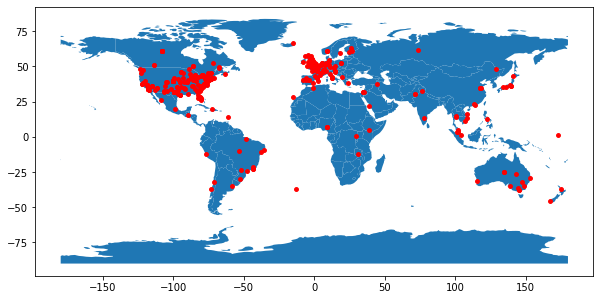

In [ ]:
# Map user location
geometry = [Point(xy) for xy in zip(df1['Lon'], df1['Lat'])]
gdf = gp.GeoDataFrame(df1, geometry=geometry)   

title_text = ('User Locations using Hashtag ' + tag)

print(title_text)
plt.show()
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);


In [ ]:
# Plot interactive user locations with tweet text in popups
print()

map1 = folium.Map()
for index,row in df1.iterrows(): 
  popup = folium.Popup(row['text'],
                     max_width=500)
  folium.Marker(location=(row['Lat'],row['Lon']), popup=popup).add_to(map1)

display(map1)